In [276]:
import h5py
from matplotlib import pyplot as plt
import numpy as np
from pprint import pprint
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline 

In [2]:
def get_dataset(file_number):
    dataset_file_object = h5py.File(f"data_{file_number}.h5",'r')
    return dataset_file_object.get('x').value,dataset_file_object.get('y').value

In [3]:
def plot_dataset(X,Y):
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.xlabel('X')
    plt.ylabel('Y')

In [4]:
def get_number_of_sample(X):
    return X.shape[0]

In [5]:
def get_class_counts(Y):
    unique, counts = np.unique(Y,return_counts=True)
    return dict(zip(unique,counts))

In [6]:
def describe_dataset(dataset_number):
    X,Y = get_dataset(dataset_number)
    print(f'Number of samples in dataset are {get_number_of_sample(X)}')
    print('Classes and respective number of samples')
    pprint(get_class_counts(Y))
    plot_dataset(X,Y)

# Question 1

## Part (i)

Number of samples in dataset are 100
Classes and respective number of samples
{0: 50, 1: 50}


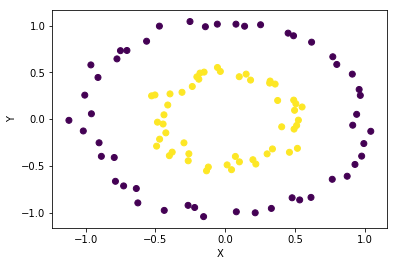

In [7]:
describe_dataset(1)

- **Class_balance** = Both classes are balanced.
- **Separability** = Samples are roughly arranged as concentric circles, therefore we would need a circular decision boundry.
- **Noise** = Their is no noise in dataset.

Number of samples in dataset are 100
Classes and respective number of samples
{0: 50, 1: 50}


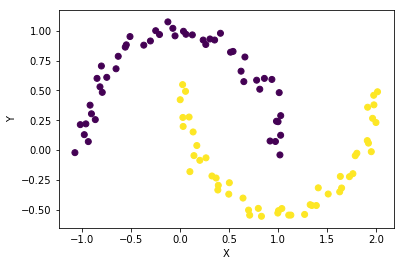

In [8]:
describe_dataset(2)

- **Class balance** = Both classes are balanced.
- **Separability** = Samples are roughly arranged as two quadratics, therefore we would need a poloynomial decision boundry.
- **Noise** = Their is no noise in dataset.

Number of samples in dataset are 100
Classes and respective number of samples
{0: 34, 1: 33, 2: 33}


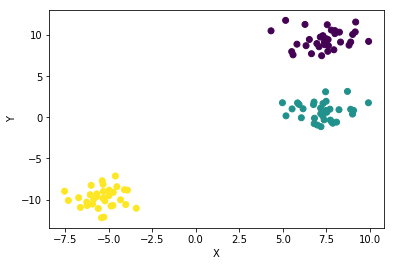

In [9]:
describe_dataset(3)

- **Class_balance** = All three classes are balanced (0 has one more sample then 1 and 2).
- **Separability** = Samples are roughly arranged as 3 different segments of space, and are linearly seprable with help of one-vs-all/one-vs-one
- **Noise** = Their is no noise in dataset.

Number of samples in dataset are 2000
Classes and respective number of samples
{0: 1000, 1: 1000}


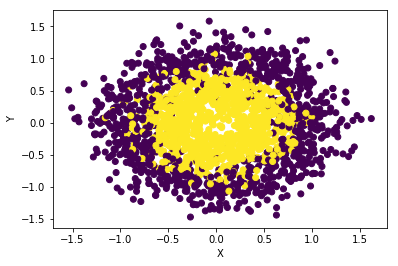

In [10]:
describe_dataset(4)

- **Class_balance** = Both classes are balanced.
- **Separability** = Samples are roughly arranged as concentric circular areas (class 0 is disc and class 1 is hollow disc), therefore we would need a circular decision boundry.
- **Noise** = Their is noise in dataset. The sepration between both dataset is almost missing. 

## Part (ii)

In [436]:
def linear_kernel(X,Y):
    return np.dot(X,Y.T)

In [540]:
def build_poly_kernel(degree):

    def poly_kernel(X,Y):
        return  (np.dot(X,Y.T)+1)**degree
    return poly_kernel

In [611]:
def radial_basis(x, y, gamma):
#     print(np.linalg.norm(np.subtract(x, y)))
    return np.exp(-gamma * (np.linalg.norm(np.subtract(x, y)))**2)

In [612]:
def closure_function_rbf(gamma = 1):
    def build_rbf(X,Y):
        kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))
        for i, x in enumerate(X):
            for j, y in enumerate(Y):
                kernel_matrix[i, j] = radial_basis(x, y,gamma)
        return kernel_matrix
    return build_rbf

In [613]:
def plot_decision_boundary(clf,X,Y):
    color = Y
    h = .02
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c = color, cmap=plt.cm.coolwarm)
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    # plt.savefig("Plots/withBoundary/data5")
#     plt.show()

In [614]:
X,Y = get_dataset(1)

In [615]:
clf = SVC(kernel=closure_function_rbf(gamma = 1))

In [616]:
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel=<function closure_function_rbf.<locals>.build_rbf at 0x7f95240a6598>,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [617]:
pred = clf.predict(X)

In [618]:
accuracy_score(Y,pred)

1.0

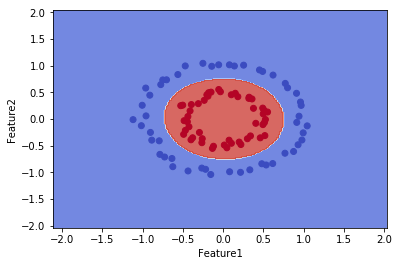

In [619]:
plot_decision_boundary(clf,X,Y)

In [285]:
# def predict_own(clf,X,Y,test_sample):
# #     print(test_sample)
#     support_vector_index = clf.support_
#     index_of_class_0_support_vectors = [i for i in support_vector_index if Y[i]==0]
#     index_of_class_1_support_vectors = [i for i in support_vector_index if Y[i]==1]
# #     print(len(index_of_class_0_support_vectors),len(index_of_class_1_support_vectors))
#     class0_support_vectors = X[index_of_class_0_support_vectors]
#     class1_support_vectors = X[index_of_class_1_support_vectors]
    
#     distance_class0 = 0
#     distance_class1 = 0
    
#     for v in class0_support_vectors:
#         distance_class0+= np.linalg.norm(v-test_sample)
    
#     for v in class1_support_vectors:
#         distance_class1+= np.linalg.norm(v-test_sample)
# #     print(distance_class1,distance_class0)
#     if distance_class0>=distance_class1:
#         return 1
#     else:
#         return 0

In [286]:
# pred_val = [predict_own(clf,X,Y,sample) for sample in X]

In [33]:
# accuracy_score(Y,pred_val)